<a href="https://colab.research.google.com/github/sanjuparampil/Image_Segmentation/blob/main/IMAGE_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip uninstall fiftyone fiftyone-db fiftyone-brain fiftyone-gui
#!pip install --upgrade pip setuptools wheel
#!pip install fiftyone-db==1.5.7
!pip install fiftyone
!pip install fiftyone-db==0.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 14.5 MB/s eta 0:00:00
  Installing build depende

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import seaborn as sns
import os,glob,sys
import cv2
import tqdm
import warnings
import matplotlib
import numpy as np
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, preprocessing
from keras.utils import to_categorical
from tqdm import tqdm



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#!unzip -o "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset (1).zip" -d "/content/drive/MyDrive/imgs/"
#extract_to_dir = '/content/drive/MyDrive/RM_Segmentation_Assignment_dataset'
#import multiprocessing
#num_cores = multiprocessing.cpu_count()
#print (num_cores)
#import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
!unzip -o "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset (1).zip" -d "/content/drive/MyDrive/imgs/"
dataset_path = '/content/drive/MyDrive/RM_Segmentation_Assignment_dataset'

Mounted at /content/drive
Archive:  /content/drive/MyDrive/RM_Segmentation_Assignment_dataset (1).zip
  inflating: /content/drive/MyDrive/imgs/test-30/000000001751.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001380.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001643.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001583.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001685.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001482.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001494.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001551.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001654.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001594.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001411.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001459.jpg  
  inflating: /content/drive/MyDrive/imgs/test-30/000000001410.jpg  
  inflating: /

In [ ]:
# This cell imports the dataset, analyses its structure and execute EDA

def import_data(dataset_path):
    data = {}
    for i in os.listdir(dataset_path):
        s_path = os.path.join(dataset_path, i)
        if os.path.isdir(s_path):
            data[i] = {}
            if i == 'test-30':
                data[i]['images'] = [os.path.join(s_path, img) for img in os.listdir(s_path) if img.endswith('.jpg')]
            else:
                json_file = os.path.join(s_path, "labels.json")
                with open(json_file, 'r') as f:
                    data[i]['labels'] = json.load(f)
                img_file = os.path.join(s_path, "data")
                data[i]['images'] = [os.path.join(img_file, img) for img in os.listdir(img_file) if img.endswith('.jpg')]
    return data

def execute_eda(data_set):
    for subset, data in data_set.items():
        print(f"\n{subset.capitalize()} ")
        if subset == 'test-30':
            print(f"No. of images: {len(data['images'])}")
        else:
            labels = data['labels']
            images = data['images']
            # Display class distribution
            categories = {i['name']: 0 for i in labels['categories']}
            for i in labels['annotations']:
                categories[labels['categories'][i['category_id']]['name']] += 1
            print("Class names : No.s")
            for i, j in categories.items():
                print(f"{i}: {j}")


data_set = import_data(dataset_path)
execute_eda(data_set)


Train-300 
Class names : No.s
airplane: 15
backpack: 84
banana: 15
baseball bat: 6
baseball glove: 12
bear: 3
bench: 49
bicycle: 125
bird: 57
boat: 20
book: 2
bottle: 10
bowl: 10
broccoli: 1
bus: 91
cake: 13
car: 1061
carrot: 4
cat: 4
cell phone: 19
chair: 51
clock: 17
cow: 1
cup: 21
dining table: 25
dog: 14
donut: 4
elephant: 5
fire hydrant: 9
fork: 6
frisbee: 3
giraffe: 1
handbag: 72
horse: 17
hot dog: 3
kite: 55
knife: 4
laptop: 2
motorcycle: 73
oven: 2
parking meter: 9
person: 1350
pizza: 10
potted plant: 9
refrigerator: 2
remote: 1
sandwich: 6
scissors: 2
skateboard: 30
skis: 11
spoon: 1
sports ball: 23
stop sign: 14
suitcase: 14
surfboard: 15
tennis racket: 7
tie: 12
traffic light: 167
train: 10
truck: 120
umbrella: 68
vase: 1
wine glass: 2

Test-30 
No. of images: 30

Validation-300 
Class names : No.s
airplane: 5
apple: 12
backpack: 46
banana: 10
baseball bat: 6
baseball glove: 5
bench: 34
bicycle: 71
bird: 2
boat: 45
book: 34
bottle: 59
bowl: 16
bus: 110
cake: 18
car: 861
car

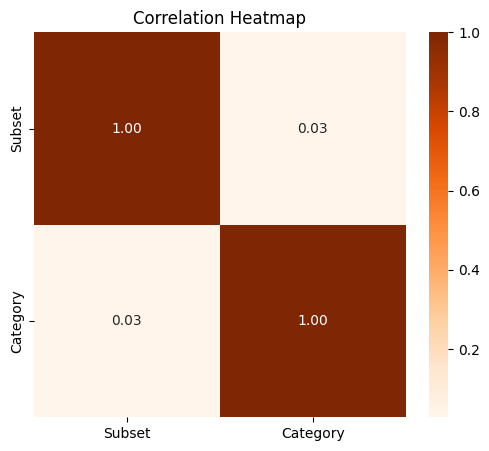

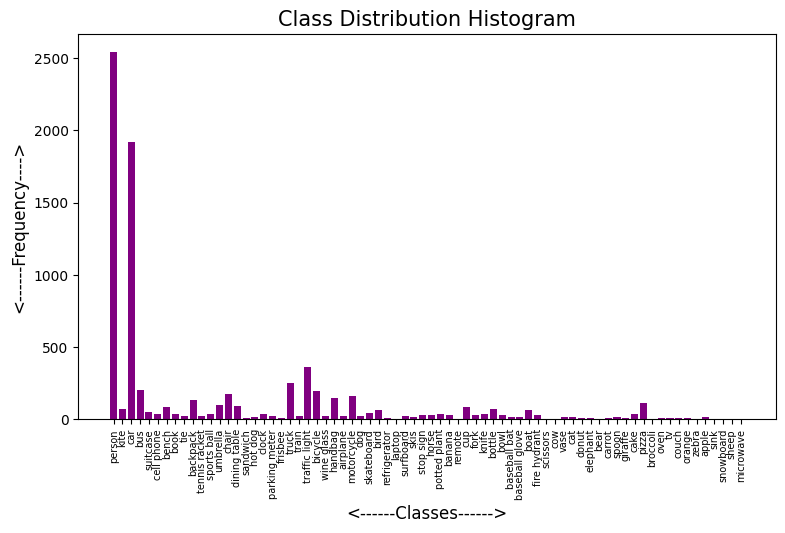

In [ ]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from collections import Counter
from matplotlib_venn import venn2, venn2_circles


#  Extract class distribution
def extract_class_distribution(data_set):
    class_distribution = {}
    for subset, data in data_set.items():
        if subset != 'test-30':
            labels = data['labels']
            for annotation in labels['annotations']:
                category_name = labels['categories'][annotation['category_id']]['name']
                if category_name in class_distribution:
                    class_distribution[category_name] += 1
                else:
                    class_distribution[category_name] = 1
    return class_distribution

class_distribution = extract_class_distribution(data_set)

# Compute correlation heatmap
def compute_correlation_heatmap(data_set):
    labels_data = []
    for subset, data in data_set.items():
        if subset != 'test-30':
            labels = data['labels']
            for annotation in labels['annotations']:
                category_name = labels['categories'][annotation['category_id']]['name']
                labels_data.append([subset, category_name])

    df = pd.DataFrame(labels_data, columns=['Subset', 'Category'])

    le = LabelEncoder()
    df['Subset'] = le.fit_transform(df['Subset'])
    df['Category'] = le.fit_transform(df['Category'])

    correlation_matrix = df.corr()
    plt.figure(figsize=(6, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

compute_correlation_heatmap(data_set)

# Plot histogram of class distribution
def plot_histogram(class_distribution):
    plt.figure(figsize=(9, 5))
    plt.bar(class_distribution.keys(), class_distribution.values(), color='purple')
    plt.xlabel('<------Classes------>', fontsize=12)
    plt.ylabel('<------Frequency---->',fontsize=12)
    plt.title('Class Distribution Histogram', fontsize=15)
    plt.xticks(rotation=90, fontsize=7)
    plt.show()

plot_histogram(class_distribution)



In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

# Check and load or create the training dataset
if "train_dataset" in fo.list_datasets():
    train_dataset = fo.load_dataset("train_dataset")
else:
    # Example: Creating a new dataset for training
    train_dataset = fo.Dataset("train_dataset")
    # TODO: Load your training data into `train_dataset` here
    # For example, loading from the FiftyOne Dataset Zoo
    # train_dataset.add_samples([...])
    train_dataset.save()

# Check and load or create the validation dataset
if "val_dataset" in fo.list_datasets():
    val_dataset = fo.load_dataset("val_dataset")
else:
    # Example: Creating a new dataset for validation
    val_dataset = fo.Dataset("val_dataset")
    # TODO: Load your validation data into `val_dataset` here
    # For example, loading from the FiftyOne Dataset Zoo
    # val_dataset.add_samples([...])
    val_dataset.save()

In [ ]:
#This cell displays fiftyone to visualise the .json files and to
#see masks in it

import fiftyone as fo
import fiftyone.zoo as foz

# Define paths
train_images_dir = '/content/drive/MyDrive/imgs/train-300/data'
val_images_dir = '/content/drive/MyDrive/imgs/validation-300/data'
train_annotations_path = '/content/drive/MyDrive/imgs/train-300/labels.json'
val_annotations_path = '/content/drive/MyDrive/imgs/validation-300/labels.json'

# Function to load a dataset
def load_dataset(data_path, labels_path, dataset_name):
    # Ensure any existing dataset with the same name is deleted before loading
    if fo.dataset_exists(dataset_name):
        fo.delete_dataset(dataset_name)

    dataset = fo.Dataset.from_dir(
        dataset_type=fo.types.COCODetectionDataset,
        data_path=data_path,
        labels_path=labels_path,
        include_id=True,
        name=dataset_name
    )
    return dataset

# Function to delete datasets
def delete_datasets(dataset_names):
    for name in dataset_names:
        if fo.dataset_exists(name):
            fo.delete_dataset(name)

# Load the datasets
train_dataset = load_dataset(train_images_dir, train_annotations_path, "train_dataset")
val_dataset = load_dataset(val_images_dir, val_annotations_path, "val_dataset")

# Print dataset information
print(train_dataset)
print(val_dataset)


# Optionally, visualize one of the datasets
session = fo.launch_app(train_dataset)

# After operations are done, delete the last two datasets
#delete_datasets(["train_dataset", "val_dataset"])


 100% |█████████████████| 300/300 [10.1s elapsed, 0s remaining, 43.8 samples/s]     


INFO:eta.core.utils: 100% |█████████████████| 300/300 [10.1s elapsed, 0s remaining, 43.8 samples/s]     


 100% |█████████████████| 300/300 [10.1s elapsed, 0s remaining, 32.3 samples/s]     


INFO:eta.core.utils: 100% |█████████████████| 300/300 [10.1s elapsed, 0s remaining, 32.3 samples/s]     


Name:        train_dataset
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:            fiftyone.core.fields.ObjectIdField
    filepath:      fiftyone.core.fields.StringField
    tags:          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    coco_id:       fiftyone.core.fields.IntField
Name:        val_dataset
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:            fiftyone.core.fields.ObjectIdField
    filepath:      fiftyone.core.fields.StringField
    tags:          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:      fiftyone.core.fields.EmbeddedDocumentF


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.6

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.6

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [ ]:
# Implement R-CNN model for image segmentation

def create_rcnn_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=x)
    return model

def preprocess_image(img_path, target_size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.resnet.preprocess_input(img)
    return img

def data_generator(dataset, batch_size, target_size):
    num_classes = len(dataset['train-300']['labels']['categories'])
    while True:
      batch_paths = np.random.choice(dataset['train-300']['images'], size=batch_size)
      batch_images = []
      batch_labels = []

      for img_path in batch_paths:
        img = preprocess_image(img_path, target_size)
        batch_images.append(img)
        label = np.zeros(num_classes)
        annotations = dataset['train-300']['labels']['annotations']
        for annotation in annotations:
          if annotation['image_id'] == int(os.path.basename(img_path)[:-4]):
            label[annotation['category_id']] = 1
        batch_labels.append(label)

      yield np.array(batch_images), np.array(batch_labels)

In [24]:
# Parameters
input_shape = (224, 224, 3)  # Input shape for ResNet50
num_classes = len(data_set['train-300']['labels']['categories'])
batch_size = 40
epochs = 50

In [25]:
# Create and compile the model
model = create_rcnn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# Train the model
train_steps = len(data_set['train-300']['images']) // batch_size
validation_steps = len(data_set['validation-300']['images']) // batch_size
train_generator = data_generator(data_set, batch_size, (input_shape[0], input_shape[1]))
validation_generator = data_generator(data_set, batch_size, (input_shape[0], input_shape[1]))
history = model.fit(train_generator, steps_per_epoch=train_steps, epochs=epochs, validation_data=validation_generator, validation_steps=validation_steps)

Epoch 1/50
7/7 [==============================] - 13s 2s/step - loss: 0.1968 - accuracy: 0.0036 - val_loss: 0.0169 - val_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.0135 - accuracy: 0.0000e+00 - val_loss: 0.0167 - val_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.0100 - accuracy: 0.0036 - val_loss: 0.0113 - val_accuracy: 0.0107
Epoch 4/50
7/7 [==============================] - 6s 1s/step - loss: 0.0164 - accuracy: 0.0036 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 6s 1s/step - loss: 0.0098 - accuracy: 0.0036 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 11s 2s/step - loss: 0.0093 - accuracy: 0.0071 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 8

In [40]:
def predict_test_data(model, test_images):
    predictions = []
    for img_path in test_images:
        img = preprocess_image(img_path, (224, 224))
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        prediction = model.predict(img)
        predictions.append(prediction)
    return predictions

# Load test images
test_images = data_set['test-30']['images']

# Make predictions on test data
predictions = predict_test_data(model, test_images)


1/1 [==============================] - 0s 21ms/step


In [42]:
# Function to perform inference on test images
def predict_classes(model, test_images):
    classes = {0: 'person', 1: 'car', 2: 'dog', 3: 'cake'}
    predictions = []
    for img_path in test_images:
        img = preprocess_image(img_path, (224, 224))
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)
        if predicted_class not in classes:
            print(f"Warning: Predicted class index {predicted_class} is not in the expected range.")
            predictions.append('Unknown')
        else:
            predictions.append(classes[predicted_class])
    return predictions

#test_images_path = "./COCO-2017 dataset/test-30"
test_images_path = "/content/drive/MyDrive/imgs/test-30"

# Get list of test image paths
test_image_paths = [os.path.join(test_images_path, img) for img in os.listdir(test_images_path) if img.endswith('.jpg')]

# Perform inference on test images
test_predictions = predict_classes(model, test_image_paths)

# Print the predicted classes of test images
for i, prediction in enumerate(test_predictions):
    print(f"Image {i+1}: {prediction}")

1/1 [==============================] - 0s 21ms/step
Image 1: person
Image 2: Unknown
Image 3: Unknown
Image 4: Unknown
Image 5: car
Image 6: Unknown
Image 7: Unknown
Image 8: person
Image 9: Unknown
Image 10: Unknown
Image 11: Unknown
Image 12: car
Image 13: Unknown
Image 14: Unknown
Image 15: Unknown
Image 16: Unknown
Image 17: person
Image 18: Unknown
Image 19: Unknown
Image 20: Unknown
Image 21: person
Image 22: Unknown
Image 23: Unknown
Image 24: Unknown
Image 25: car
Image 26: Unknown
Image 27: Unknown
Image 28: car
Image 29: Unknown
Image 30: Unknown


In [43]:
# Function to evaluate the model on test images
def evaluate_model(model, test_images, class_keys):
    num_correct = 0
    total_images = len(test_images)
    for img_path in test_images:
        img = preprocess_image(img_path, (224, 224))
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)
        if predicted_class not in class_keys:
            print(f"Warning: Predicted class index {predicted_class} is not in the expected range for image {img_path}.")
        else:
            predicted_label = class_keys[predicted_class]

            print(f"Predicted Class for {img_path}: {predicted_label}")

            num_correct += 1
    accuracy = num_correct / total_images
    return accuracy


# Evaluate the model on test images and print accuracy
accuracy = evaluate_model(model, test_image_paths, class_keys)
print(f"Accuracy: {accuracy}")


1/1 [==============================] - 0s 25ms/step
Predicted Class for /content/drive/MyDrive/imgs/test-30/000000001600.jpg: car
1/1 [==============================] - 0s 27ms/step
Predicted Class for /content/drive/MyDrive/imgs/test-30/000000001685.jpg: person
1/1 [==============================] - 0s 22ms/step
Predicted Class for /content/drive/MyDrive/imgs/test-30/000000001654.jpg: car
1/1 [==============================] - 0s 26ms/step
Predicted Class for /content/drive/MyDrive/imgs/test-30/000000001494.jpg: car
1/1 [==============================] - 0s 24ms/step
Predicted Class for /content/drive/MyDrive/imgs/test-30/000000001411.jpg: car
1/1 [==============================] - 0s 23ms/step
Predicted Class for /content/drive/MyDrive/imgs/test-30/000000001717.jpg: car
1/1 [==============================] - 0s 23ms/step
Predicted Class for /content/drive/MyDrive/imgs/test-30/000000001410.jpg: car
1/1 [==============================] - 0s 22ms/step
Predicted Class for /content/drive/